# Analysis of The New York Times newspaper in years 1938-1946

In this notebook an analysis of The New York Times newspaper in years 1938-1946 will be conducted. For each year, one newspaper was chosen from the beginning of May.

One of the most popular american newspaper during Second World War provided most crucial information concerning front advances and american intervention which started in late 1941.

Source: <https://archive.org/details/pub_new-york-times?sort=title&and%5B%5D=year%3A%221944%22>

## Preparing and verifying the Corpus

Analysis of this corpus will be conducted with respect to individual newspaper issue each year.
Important to mention is that texts in this Corpus were retrieved using automatic transcription tools from digitized physical papers. After manual inspection, I noticed that due to poor quality  physical text and quite excentric font used, transcription has many inaccuracies thus the analysis is made on crude premises. 

In [1]:
import corpus_class as dc
import tokenedtext_class as prep
import freq_analysis as freq_a
import comp_analysis as comp_a
import result_visualisation as re_vis

import matplotlib.pyplot as plt
import os

In [2]:
the_times_path = f"{os.getcwd()}\exemplar_texts\\the_times"
corpus_the_times = dc.Corpus(the_times_path)

Processing new_york_times_38.txt...
Processing new_york_times_39.txt...
Processing new_york_times_40.txt...
Processing new_york_times_41.txt...
Processing new_york_times_42.txt...
Processing new_york_times_44.txt...
Processing new_york_times_45.txt...
Processing new_york_times_46.txt...
Corpus the_times has been created


In [3]:
the_times_info = corpus_the_times.get_basic_info()
print(the_times_info)

Basic info concerning the_times corpus:
Number of text files: 8
Number of distinct tokens: 159706
Total number of words: 1282889


**Basic information concerning The New York Times corpus**

There are 159706 unique words used in the whole work and 1282889 words in total, which makes this the largest corpus analysed in this project.

## Basic frequency analysis on The Times Corpus

**Bar graph:**

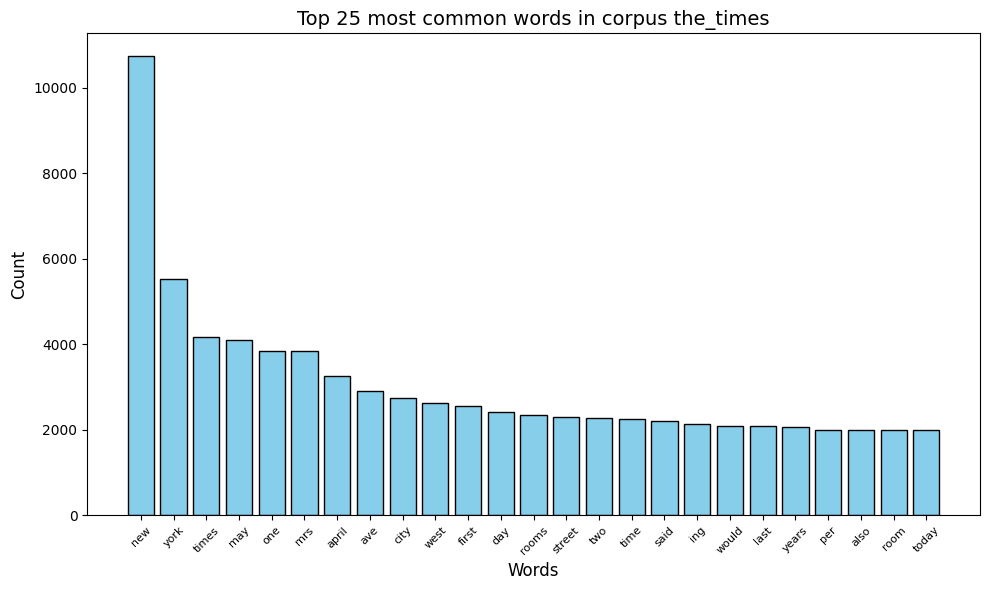

In [4]:
the_times_common = freq_a.create_bar_count(corpus_the_times, n=25)
plt.show()

**Comment:**
Three most common words create *'New York Times'* title, with *'the'* being omitted through stopword deletion. Other common words point very broadly to day-to-day topics of the newspaper: *'street', ''city', 'ave'* used in advertisments; *'day', 'time', 'today'* to relate time of specific events and *'may'* as almost all used issues were printed in May of given year.

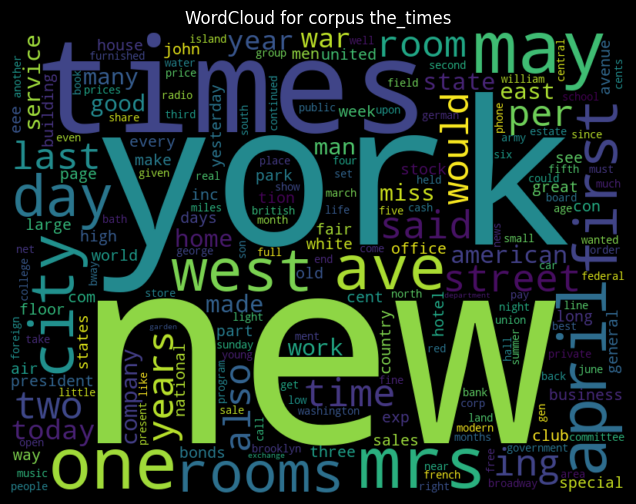

In [5]:
the_times_wordcloud = freq_a.create_word_cloud(corpus_the_times)
plt.show()


## Comparative analysis between respective sub-books in Republic Corpus

In this part I will focus on comparisons made between individual issues.

**Cosine Similarity:**

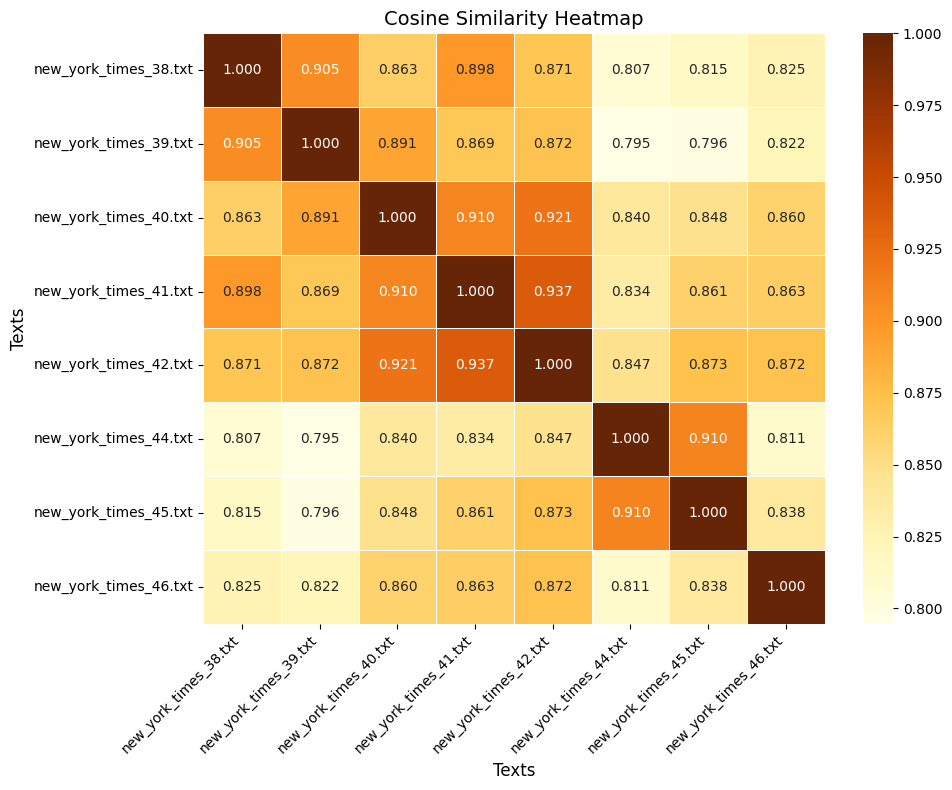

In [6]:
the_times_csim = corpus_the_times.cos_similarity_matrix()
the_times_csim_fig = comp_a.plot_cos_similarity_heatmap(the_times_csim)
plt.show()

**Comment:**
On the presented heatmap for the New York Times corpus, the most noticeable feature is the diagonal with a value of 1. This is expected since each text has the highest possible similarity with itself.

Beyond the diagonal, the heatmap reveals high similarity between specific groups of texts. Notably, texts from year 1940 through 1942 show high similarity values (ranging from 0.910 to 0.937), suggesting that these articles may cover related topics or follow similar reporting styles. This cluster probably reflects the rise of the Second World War in Europe and later participation of the United States in the late 1941.

Another interesting observation is the moderate similarity throughout years 1938 to 1942, indicating a secondary cluster of related content, before the War creeped into american media.

The texts from year '44-'46 show relatively lower similarity values compared to the earlier texts, especially with the first group (years '38-'42), with similarities dropping to around 0.795–0.838. This suggests a shift in topic or style, possibly reflecting coverage of different subjects stemming from intensive participation in the war efforts. However, within this later group, 44.txt and 45.txt exhibit high similarity (0.910), indicating that they might be part of another cluster.

The least similar pair is year '39 and '44, with a cosine similarity value of 0.795, highlighting a significant divergence in content or style between these two texts.

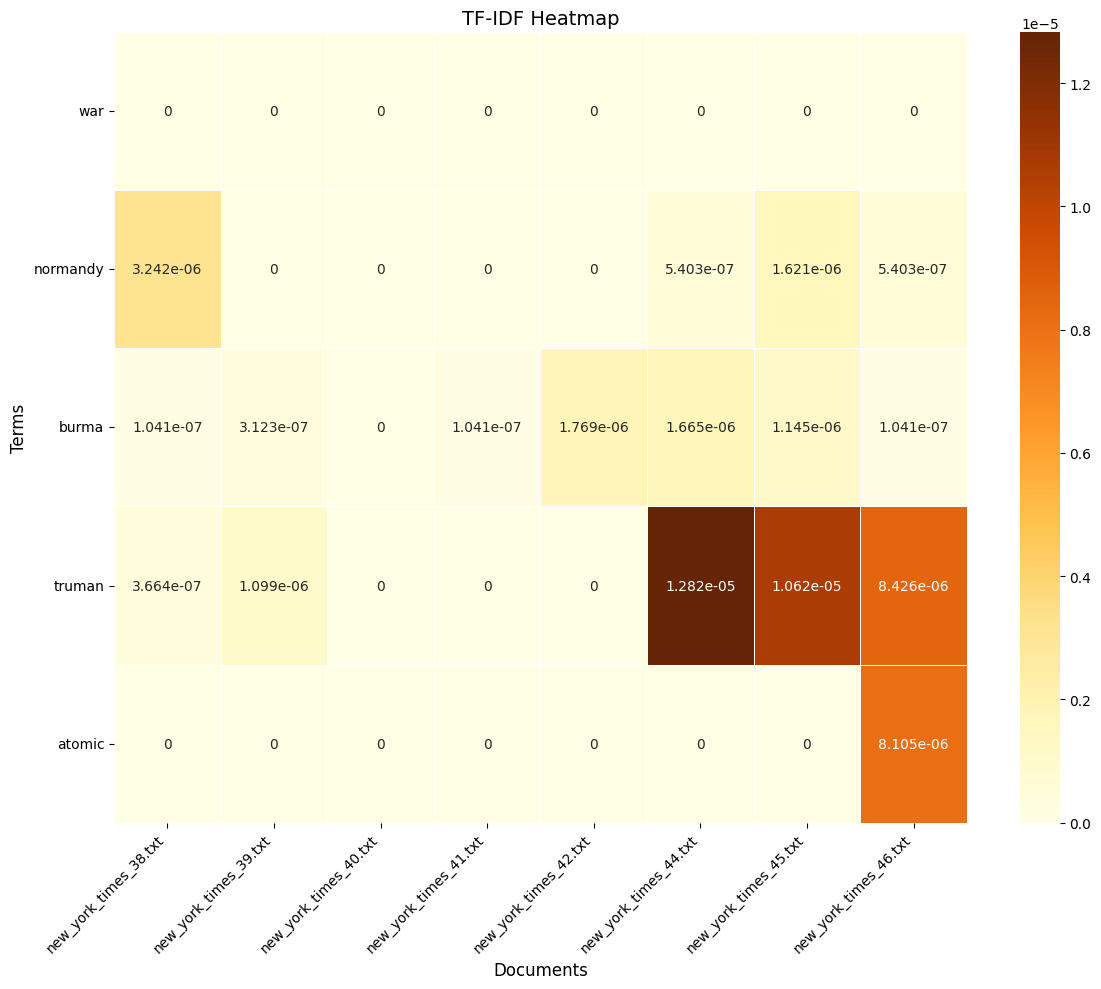

In [7]:
times_rand_toks = corpus_the_times.get_random_tokens(n=10, seed=452)
times_toks = ['war', 'normandy', 'burma', 'truman', 'atomic']
times_tf_idf = comp_a.get_tf_idf_batch(times_toks, corpus_the_times)
times_td_idf_fig = comp_a.plot_tf_idf_matrix(times_tf_idf)
plt.show()

**Comment:**
- *'war'*: Although seemingly quite common word used in these years, TF-IDF metric indicates unique words within the whole corpus. 'war' was probably extensively used word through all these years thus its uniqueness is low and not visible in this heatmap.
- *'normandy'*: Normandy, northern coast of France, was the landing site of Allied forces in June 1944. That is probably why this term is seen to be unique in years 1944 onward. It's interesting to see it also in year 1938, but after manual inspection it appears to be used in few unrelated topics in this issue.
- *'burma'*: Burma, currently known as Myanmar, was still a british colony during 1930's. Before 1937 it was part of British India, and was consecutively separated. That's probably why there are few mentions in 1938 and 1939. Starting in the late 1941, Burma was invaded by Axis forces which is probably the reason why its name has been mentioned from 1942 onward.
- *'truman'*: Referring to Harry S. Truman, president of the USA starting his first presidential term in April 1945. In 1944 he began extensive campaign for vice-presidency and later for presidency as democratic representant. This fact is visible in his name occurrences: almost no mentions before '42 and high rise with gradual decrease beginning in '44.
- *'atomic'*: Reffering to atomic energy and atomic bomb. Term 'atomic' was never used prior to Hiroshima and Nagasaki bombings (August 1945), as popular knowledge was non-existent of these concepts.

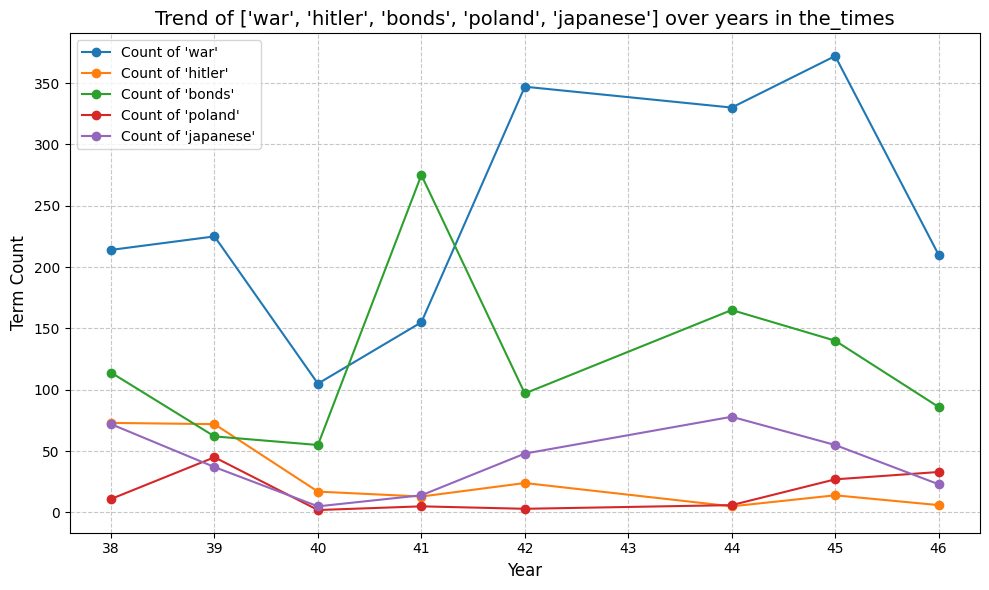

In [8]:
times_change_fig = re_vis.change_over_time_times(corpus_the_times, ['war', 'hitler', 'bonds', 'poland', 'japanese'])
plt.show()

**Comment:**
- *'war'*: Most commonly present in issues from '38-'39 and '42-'45. This term very visibly shows american interest in the Second World War throughout these years: '38-'39, when the War was just starting in Europe, drop in years '40-'41  when USA followed no-intervention approach and rapid rise from '42 onward as the USA began its active participation in the war efforts. As mentioned in TF-IDF analysis, this term was very commonly used in each issue and so it was not 'picked up' by the metric.
- *'bonds'*: Referring to governmental financial security asset, which was used by the US government to fund ongoing war budget. There were many advertisments to help the war efforts by buying war bonds and so this term begins to be common from '41 onward, when the US began its extensive defensive military budget fundings.
- *'poland'*: Mentioned most commonly in May 1939. This may come as a surprise, as no invasion on polish territories have happened so far. Nonetheless, on 28 April of 1939, Hitler denounced the declaration of non-aggression between Poland and Germany, signed in 1934. This is probably why Poland was mention so frequently.
- *'japanese'*: Reffered to ongoing attack by japanese imperial forces and later counter-invasion of the US military. 